<a href="https://colab.research.google.com/github/divyashah99/DrowsinessDetection/blob/master/BitcoinPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 

In [3]:
df  = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv")

In [4]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [9]:
print(df.loc[1023,"btc_market_price" ]
      )

13.6888


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

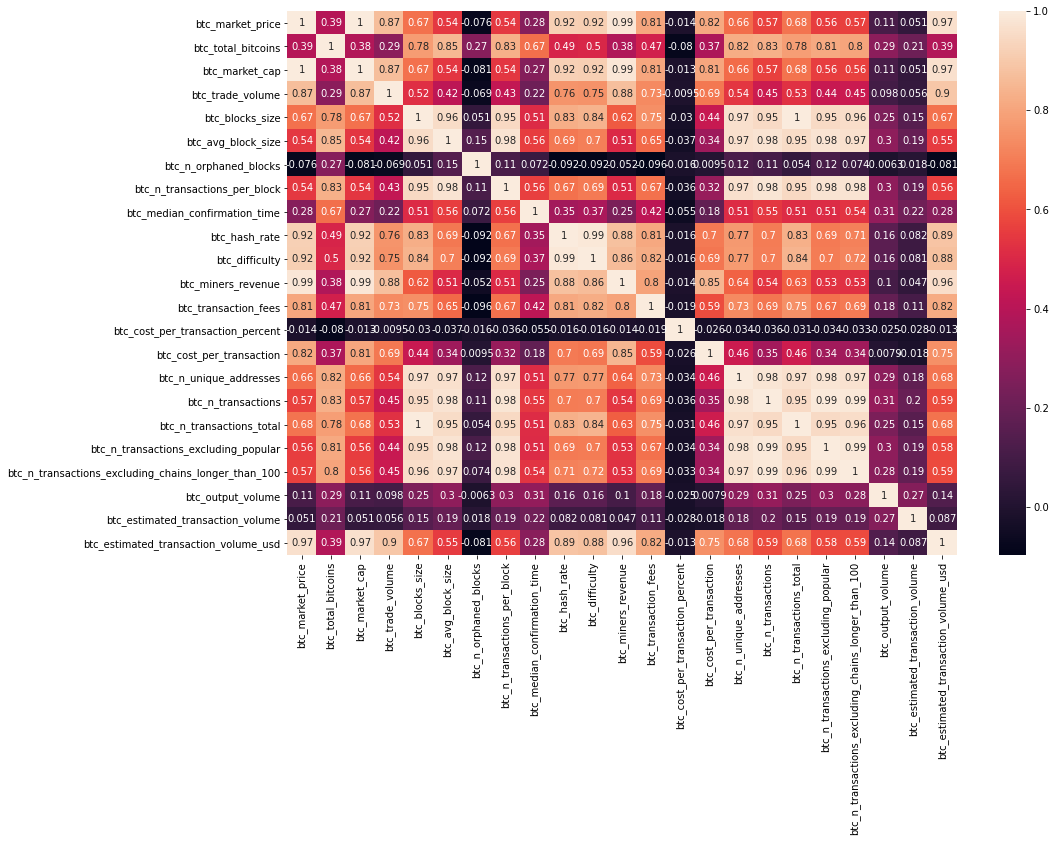

In [15]:
correlations = df.corr()
f , ax = plt.subplots(figsize = (15,10))
sns.heatmap(correlations , annot = True)

In [17]:
x = df.loc[:, ["btc_market_cap", "btc_n_transactions","btc_miners_revenue"	,"btc_cost_per_transaction","btc_difficulty","btc_hash_rate","btc_cost_per_transaction_percent"]]

In [18]:
x=x.fillna(x.mean())

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [20]:
y = df.loc[:,["btc_market_price"]]

In [22]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_val.shape)
print('y_test shape: ', y_val.shape)

X_train shape:  (2324, 7)
y_train shape:  (2324, 1)
X_test shape:  (582, 7)
y_test shape:  (582, 1)


In [23]:
linModel = LinearRegression()  
linModel.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [24]:
linPrediction = linModel.predict(X_val)


In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np 
print('Training Accuracy:',(100*linModel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*linModel.score(X_val, y_val)).round(2),'%')
MAE1=mean_absolute_error(linPrediction,y_val)
MSE1=mean_squared_error(y_val,linPrediction)
print('Mean Absolute error in Model 1:',MAE1.round(2))
print(' Mean Squared Error in Model 1:',MSE1.round(2))

Training Accuracy: 99.99 %
Validation Accuracy 99.99 %
Mean Absolute error in Model 1: 13.3
 Mean Squared Error in Model 1: 439.06
